In [3]:
from importlib import reload
import src.UNET
import src.preprocessing
reload(src.UNET)
reload(src.preprocessing)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


In [4]:
# Load images
PATCH_SIZE = 128

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])


In [5]:
# Build model equal to the tested model

unet = UNET(args = '', image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers = 3)
unet.build_model()
model = unet.get_model()

Building model with 3 layers
Filtersizes being used in UNET: [16, 32, 64, 128]
Bulding contraction layers at layer: 1 and filtersize: 16
Bulding contraction layers at layer: 2 and filtersize: 32
Bulding contraction layers at layer: 3 and filtersize: 64
Building bottleneck at layer: 3 and filtersize: 128
Building expansion at layer: 3 and filtersize: 64
Building expansion at layer: 2 and filtersize: 32
Building expansion at layer: 1 and filtersize: 16
Compiling model...
Model compiled.


In [6]:
model.load_weights('./models/F1_0.8458_LAY3.h5')

In [20]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 98ms/step


[0.19410502910614014,
 0.891162633895874,
 0.8800626993179321,
 0.9025462865829468,
 0.64642333984375]

In [153]:
# Run predictions
n = 0
pred = model.predict(x_train[n:n+1, :, :, :])
#pred[pred > 0.5] = 1
#pred[pred <= 0.5] = 0

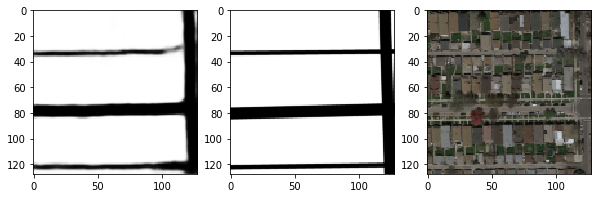

In [154]:

f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(pred.reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [157]:
from src.create_submission import create_submission

create_submission('dummy_submission.csv', model)


Succesfully created submission.
